In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


---

### Carregando a base de dados:
A base de dados foi dividida em 2 arquivos, um para treino e outro para teste, para a análise geral dos dados, vamos unifica-los

In [32]:
# Caminhos dos arquivos
treino_caminho = "avila-tr.txt"
teste_caminho = "avila-ts.txt"

# Carregar as bases de treino e teste
treino_df = pd.read_csv(treino_caminho, delimiter=",", header=None)
teste_df = pd.read_csv(teste_caminho, delimiter=",", header=None)

# Concatenar as bases (ignorando os índices originais e criando um novo índice contínuo)
df = pd.concat([treino_df, teste_df], ignore_index=True)

#### Primeiras linhas da base de dados:

In [45]:
print(df.head(),)

         0         1         2         3         4         5         6   \
0  0.266074 -0.165620  0.320980  0.483299  0.172340  0.273364  0.371178   
1  0.130292  0.870736 -3.210528  0.062493  0.261718  1.436060  1.465940   
2 -0.116585  0.069915  0.068476 -0.783147  0.261718  0.439463 -0.081827   
3  0.031541  0.297600 -3.210528 -0.583590 -0.721442 -0.307984  0.710932   
4  0.229043  0.807926 -0.052442  0.082634  0.261718  0.148790  0.635431   

         7         8         9  10  
0  0.929823  0.251173  0.159345  A  
1  0.636203  0.282354  0.515587  A  
2 -0.888236 -0.123005  0.582939  A  
3  1.051693  0.594169 -0.533994  A  
4  0.051062  0.032902 -0.086652  F  


#### Últimas linhas da base de dados:

In [47]:
print(df.tail())

             0         1         2         3         4         5         6   \
20862 -0.128929 -0.040001  0.057807  0.557894  0.261718 -0.930856 -0.044076   
20863  0.266074  0.556689 -0.020434  0.176624  0.261718 -0.515608  0.597681   
20864 -0.054866  0.580242  0.032912 -0.016668  0.261718  1.519109  0.371178   
20865  0.080916  0.588093  0.015130  0.002250  0.261718 -0.930856 -0.270579   
20866  0.377169  0.014957  0.381439  0.292753  0.261718 -1.470679 -0.006326   

             7         8         9  10  
20862  1.158458  2.277968 -0.699884  X  
20863  0.178349  0.625350 -0.657245  G  
20864 -0.985508 -0.403638  1.276301  A  
20865  0.163807 -0.091823 -0.593329  F  
20866 -0.494919 -0.247731 -1.212974  H  


---

### Análise exploratória dos dados

#### 1. Descrição geral da base de dados:

Entendimento geral da base de dados, explorando alguns pontos como:
- Número de registros e features
- Tipologia dos dados
- Descrição das features
- Distribuição de classes
- Verificação de inconsistências
- Análise de outliers

#### 1.1 Número de registros e Número de features:

In [9]:
# Número de registros:
num_registros, num_features = df.shape
num_features -= 1 # Removendo a coluna de classes da contagem de features
print(f"Número de registros: {num_registros}")
print(f"Número de features: {num_features}")

Número de registros: 20867
Número de features: 10


#### 1.2 Tipologia dos dados

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20867 non-null  float64
 1   1       20867 non-null  float64
 2   2       20867 non-null  float64
 3   3       20867 non-null  float64
 4   4       20867 non-null  float64
 5   5       20867 non-null  float64
 6   6       20867 non-null  float64
 7   7       20867 non-null  float64
 8   8       20867 non-null  float64
 9   9       20867 non-null  float64
 10  10      20867 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.8+ MB


Podemos observar que a tipologia da base de dados tem:

- 10 colunas de variáveis numéricas
- 1 coluna de classes

Vale salientar que as varíaveis numéricas foram normalizadas com a técnica Z-score.

#### 1.3 Descrição das features

As variáveis do conjunto são nomeadas da seguinte forma:
- F1: intercolumnar distance 
- F2: upper margin 
- F3: lower margin 
- F4: exploitation 
- F5: row number 
- F6: modular ratio 
- F7: interlinear spacing 
- F8: weight 
- F9: peak number 
- F10: modular ratio/ interlinear spacing

As colunas se referem a medidas da caligrafia dos copistas, sendo assim, são todas variáveis numéricas.

A uníca coluna com dados considerados categóricos, é justamente a coluna das classes

#### 1.4 Distribuição das classes:

In [16]:
# A última coluna se refere às classes
class_column = df.iloc[:, -1]

# Contagem de registros de cada classe
class_counts = class_column.value_counts()

print(class_counts)

10
A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: count, dtype: int64


#### 1.5 Verificação de valores ausentes:

In [74]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Como pode ser observado, a base de dados não possui valores ausentes

#### 1.6 Verificação de valores inconsistentes:

Primeiro, vamos verificar se existe alguma classe inesperada, considerando que as possíveis classes predeterminadas são: [A, B, C, D, E, F, G, H, I, W, X, Y]

In [93]:
# Defina as classes esperadas
classes_validas = {"A", "B", "C", "D", "E", "F", "G", "H", "I", "W", "X", "Y"}

# Identificar valores que não pertencem ao conjunto esperado
classes_invalidas = df[~df[10].isin(classes_validas)]

if not classes_invalidas.empty:
    print("Classes inválidas encontradas:\n", classes_invalidas)
else:
    print("Todas as classes estão corretas.")

Todas as classes estão corretas.


---

Para as colunas de variáveis (0 a 9) vamos verificar se todos os registros são floats:

In [97]:
for coluna in range(10):  # Suas colunas float vão de 0 a 9
    tipos_unicos = df[coluna].apply(type).unique()
    print(f"Coluna {coluna} contém os seguintes tipos: {tipos_unicos}")

Coluna 0 contém os seguintes tipos: [<class 'float'>]
Coluna 1 contém os seguintes tipos: [<class 'float'>]
Coluna 2 contém os seguintes tipos: [<class 'float'>]
Coluna 3 contém os seguintes tipos: [<class 'float'>]
Coluna 4 contém os seguintes tipos: [<class 'float'>]
Coluna 5 contém os seguintes tipos: [<class 'float'>]
Coluna 6 contém os seguintes tipos: [<class 'float'>]
Coluna 7 contém os seguintes tipos: [<class 'float'>]
Coluna 8 contém os seguintes tipos: [<class 'float'>]
Coluna 9 contém os seguintes tipos: [<class 'float'>]


Não há, portanto, nenhuma coluna com dados de tipo diferentes do esperado

Poderíamos também, analisar se há valores fora de intervalos predeterminados, mas nesse caso, não existem intervalos específicos para se analisar, vamos prosseguir para a análise de outliers.

---

#### 1.7 Análise de outliers:

Para a análise de outliers, vamos verificar os dados de 2 formas:
1. Dados gerais de cada coluna
2. Gráfico boxplot

In [120]:
print(df.describe().T)  # Exibe estatísticas resumidas para todas as colunas numéricas

     count          mean       std        min       25%       50%       75%  \
0  20867.0 -3.306656e-09  1.000007  -3.498799 -0.128929  0.056229  0.204355   
1  20867.0  1.849807e-02  2.853117  -2.426761 -0.259834 -0.055704  0.203385   
2  20867.0  2.328867e-03  1.058203  -3.210528  0.064919  0.217845  0.352988   
3  20867.0  1.154239e-04  0.999997  -5.440122 -0.527256  0.089437  0.643738   
4  20867.0  5.697992e-08  0.999995  -4.922215  0.172340  0.261718  0.261718   
5  20867.0  2.539710e-03  1.065179  -7.450257 -0.598658 -0.058835  0.564038   
6  20867.0  3.977168e-03  1.153325 -11.935457 -0.044076  0.220177  0.446679   
7  20867.0  2.816658e-05  1.000003  -4.247781 -0.543914  0.108279  0.648814   
8  20867.0  2.108022e-03  1.045362  -5.486218 -0.372457  0.064084  0.500624   
9  20867.0  6.938424e-05  1.000010  -6.719324 -0.515235 -0.025918  0.528425   

          max  
0   11.819916  
1  386.000000  
2   50.000000  
3    3.987152  
4    1.066121  
5   53.000000  
6   83.000000  
7 

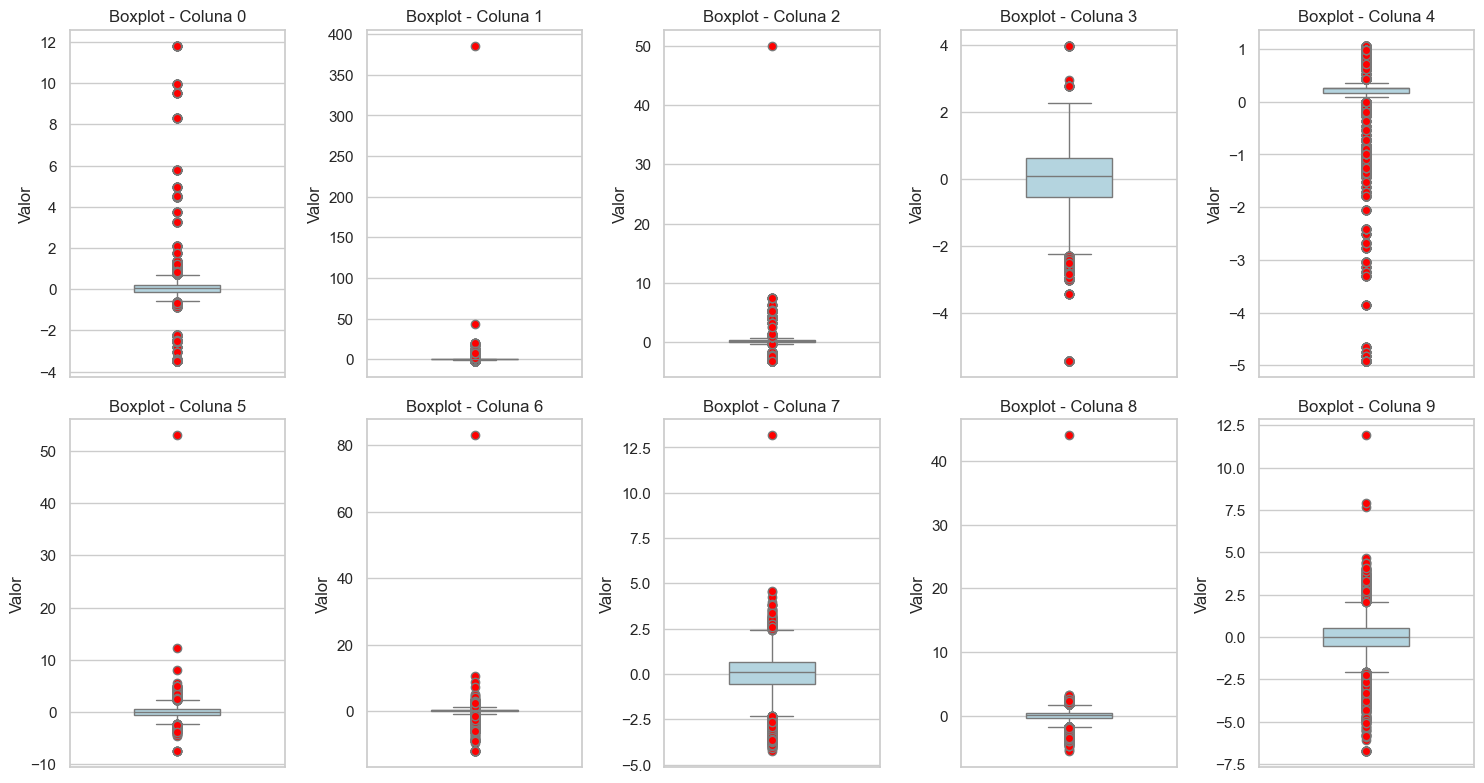

In [126]:
# Configuração do estilo
sns.set(style="whitegrid")

# Criar subplots para todas as colunas numéricas
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  # 2 linhas, 5 colunas

# Percorrer cada coluna e plotar um boxplot
for i, col in enumerate(df.iloc[:, :10].columns):
    ax = axes[i // 5, i % 5]  # Posicionar corretamente no grid
    sns.boxplot(y=df[col], ax=ax, color="lightblue", width=0.4, flierprops={"marker": "o", "markerfacecolor": "red"})
    
    ax.set_title(f'Boxplot - Coluna {col}')
    ax.set_ylabel("Valor")

# Ajustar layout
plt.tight_layout()
plt.show()